In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
#read dataset
df = pd.read_csv('./dataset/london_crime_by_lsoa.csv')

In [25]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
df.shape

(13490604, 7)

In [27]:
df.drop(['lsoa_code'], axis=1, inplace=True)

In [42]:
#filter
df_crime = df[df["value"]>=1]
df_crime = df_crime.sort_values(by=['borough','major_category','minor_category'])
df_crime

,borough,major_category,minor_category,value,year,month
1289,Barking and Dagenham,Burglary,Burglary in Other Buildings,7,2015,3
1741,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2011,10
5186,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2014,1
7329,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2013,2
16134,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2012,2
...,...,...,...,...,...,...
13458470,Westminster,Violence Against the Person,Wounding/GBH,1,2013,5
13460279,Westminster,Violence Against the Person,Wounding/GBH,3,2013,9
13471774,Westminster,Violence Against the Person,Wounding/GBH,2,2008,12
13478506,Westminster,Violence Against the Person,Wounding/GBH,1,2013,9


In [49]:
tot_crime = df_crime['value'].sum()
tot_crime

6447758

In [56]:
ye_va = df_crime[['year','value']]
ye_va = df_crime.groupby(['year'])['value'].sum()
ye_va

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [59]:
ye_va.loc[2013]

686407

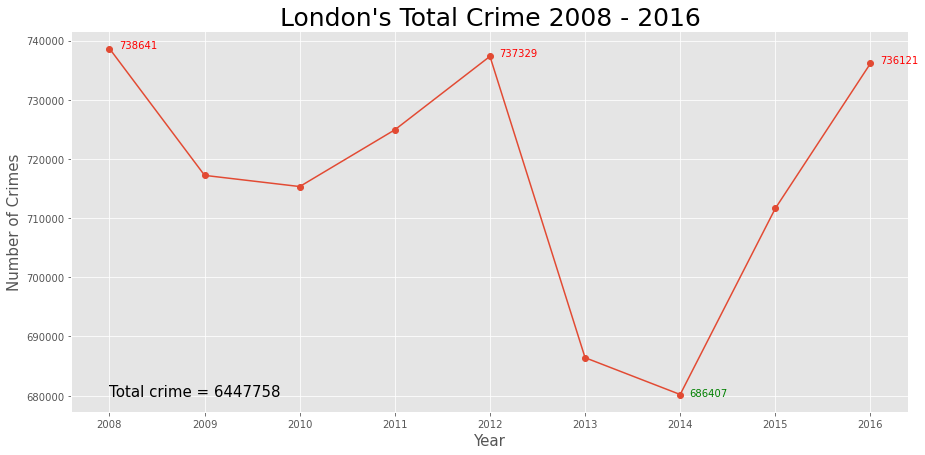

In [68]:
mpl.style.use(['ggplot'])
ye_va.plot(
    kind='line',
    marker="o",
    legend=False,
    figsize=(15,7)
)

plt.title("London's Total Crime 2008 - 2016", size=25)
plt.xlabel("Year",size=15)
plt.ylabel('Number of Crimes',size=15)

#annotate lowest
plt.text(2014.1,680000,ye_va.loc[2013],color='green',size=10)
#annotate highest highest 
plt.text(2008.1,738641,ye_va.loc[2008],color='red',size=10)
plt.text(2012.1,737329,ye_va.loc[2012],color='red',size=10)
plt.text(2016.1,736121,ye_va.loc[2016],color='red',size=10)
#annotate total crime
plt.text(2008,680000,"Total crime =" ,color='black',size=15)
plt.text(2009.1,680000, tot_crime,color='black',size=15)



plt.show()

Grafik ini menunjukan jumlah kejahatan terendah di tahun 2008-2016 terjadi di tahun 2014 sebanyak 686407 kasus, untuk 3 tertinggi terjadi di tahun 2016,2012,2008

In [81]:
bo_va = df_crime[['borough','value']]
bo_va = df_crime.groupby(['borough']).sum()
bo_va


,value,year,month
borough,,,
Barking and Dagenham,149447,174735860,560596
Barnet,212191,255915005,827498
Bexley,114136,148773536,480844
Brent,227551,261412455,848278
Bromley,184349,221017590,714532
Camden,275147,225398926,730035
City of London,780,1137829,3850
Croydon,260294,296161886,956470
Ealing,251562,281679565,910099


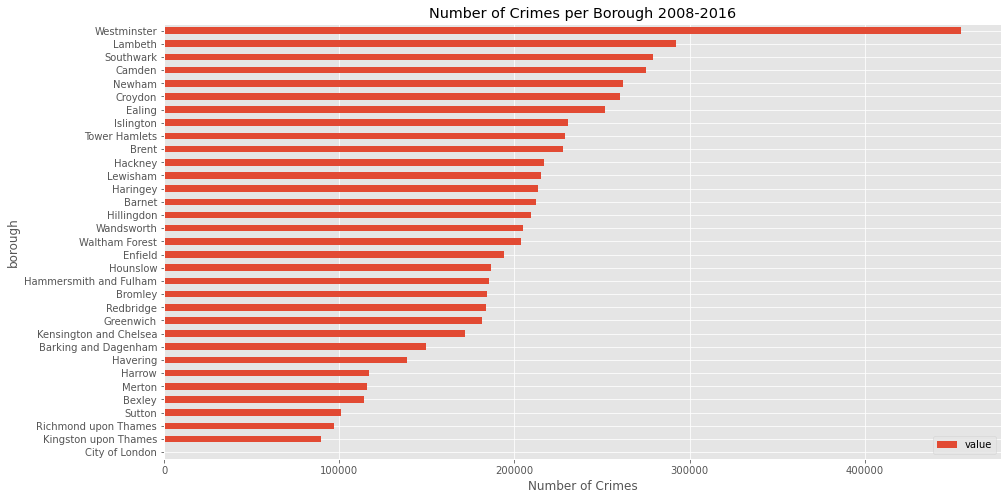

In [101]:
#borough dengan kejahatan tertinggi selama 2008-2016
bo_va.sort_values(['value']).drop(['year','month'],axis=1).plot(
    kind='barh',
    figsize=(15,8)
)

plt.title('Number of Crimes per Borough 2008-2016')
plt.xlabel('Number of Crimes')
plt.show()

Grafik ini menunjukan jumlah kejahatan per borough tahun 2008-2016 dengan jumlah tertinggi terjadi di Westminster

In [104]:
#data tahun 2014
df_crime_14 = df_crime[df_crime['year']==2014]
df_crime_14

,borough,major_category,minor_category,value,year,month
5186,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2014,1
38830,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2014,5
50119,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2014,10
77595,Barking and Dagenham,Burglary,Burglary in Other Buildings,3,2014,7
139132,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2014,10
...,...,...,...,...,...,...
13425276,Westminster,Violence Against the Person,Wounding/GBH,2,2014,5
13446264,Westminster,Violence Against the Person,Wounding/GBH,5,2014,4
13449294,Westminster,Violence Against the Person,Wounding/GBH,4,2014,11
13449889,Westminster,Violence Against the Person,Wounding/GBH,7,2014,4


In [105]:
bo_va_14 = df_crime_14[['borough','value']]
bo_va_14 = df_crime_14.groupby(['borough']).sum()
bo_va_14

,value,year,month
borough,,,
Barking and Dagenham,15426,18659710,60521
Barnet,22572,27765004,90451
Bexley,11844,15924698,51898
Brent,24426,28486016,91857
Bromley,19668,23573870,77270
Camden,27198,24532534,80020
City of London,115,171190,588
Croydon,27357,31245196,102437
Ealing,24978,29114384,95249


In [106]:
#data tahun 2016
df_crime_16 = df_crime[df_crime['year']==2016]
df_crime_16

,borough,major_category,minor_category,value,year,month
81691,Barking and Dagenham,Burglary,Burglary in Other Buildings,3,2016,5
139419,Barking and Dagenham,Burglary,Burglary in Other Buildings,1,2016,1
173222,Barking and Dagenham,Burglary,Burglary in Other Buildings,3,2016,7
186071,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2016,9
214626,Barking and Dagenham,Burglary,Burglary in Other Buildings,2,2016,1
...,...,...,...,...,...,...
13256612,Westminster,Violence Against the Person,Wounding/GBH,3,2016,8
13300926,Westminster,Violence Against the Person,Wounding/GBH,1,2016,3
13326798,Westminster,Violence Against the Person,Wounding/GBH,1,2016,12
13358223,Westminster,Violence Against the Person,Wounding/GBH,2,2016,10


In [107]:
bo_va_16 = df_crime_16[['borough','value']]
bo_va_16 = df_crime_16.groupby(['borough']).sum()
bo_va_16

,value,year,month
borough,,,
Barking and Dagenham,16741,19724544,63033
Barnet,24684,29570688,94780
Bexley,12840,16621920,54407
Brent,26693,30199680,98444
Bromley,20164,24151680,78096
Camden,29183,25466112,82550
City of London,178,245952,863
Croydon,28712,32768064,106525
Ealing,27127,30812544,99968
